In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\pd846\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets

AttributeError: _ARRAY_API not found

Libraries imported successfully!


In [2]:
# Load the CSV file
csv_paths = ['4Stu_2022_1117_1219 DataWithToolInfo.csv',
             '4Stu_2023_0118_0127  DataWithToolInfo.csv']

df_list = []
for path in csv_paths:
    df_part = pd.read_csv(path,
                          sep=';',
                          parse_dates=['timestamp_skv', 'timestamp_sensor', 'timestamp', 'timestamp.1', 'timestamp.2'],
                          dayfirst=True)
    df_list.append(df_part)

df = pd.concat(df_list, ignore_index=True)


df.head()

,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
0,2022-11-17 16:33:49.400,0.0,2022-11-17 16:33:49.506,0.0,0.106,0.001282,0.000000e+00,9.528109e-08,0.057929,0.020091,1.327992e-04,0.000017,0.000033,0.001752,0.000030,0.077239,2.465726e-13,-37.505,0.003124,0.003845,0.000010,1.0,0.020091,0.432020,2.937199e-07,0.001948,0.007690,0.001772,0.063266,1.485655e-11,-62.883,0.001530,0.005249,8.525751e-07,0.364422,0.009451,0.125858,7.585417e-08,0.000394,0.006774,0.000576,0.082633,2.584330e-12,-69.437,0.000977,0.024658,9.546103e-07,1.0,0.005274,0.773180,3.462037e-08,0.000711,0.001709,0.001381,0.111406,6.270418e-13,-72.428,0.001174,0.000007,1.413827e-07,0.102639,0.023598,0.005733,0.000015,0.000047,0.001938,0.000032,0.116880,4.413320e-14,0.0,0.003414,0.001343,0.000012,1.0,0.023598,0.734092,6.929884e-07,0.001979,0.008850,0.001728,0.075898,1.682045e-12,-59.874,0.002292,0.005920,0.000002,0.455611,0.011768,0.217750,7.585417e-08,0.000776,0.002075,0.002438,0.065509,1.843108e-12,-66.428,0.001683,0.021973,0.000003,1.000000,0.009421,0.754380,6.943981e-08,0.001233,0.001953,0.001244,0.101501,6.064764e-13,-72.428,4.707,0.614,0.590,0.756,0.747,4.949,4.392,5.349,5.926,-0.036,0.010,255.0,4.707,0.628,0.598,0.764,0.740,4.945,4.380,5.329,5.918,0.014,-0.001,255.0,4.706,0.618,0.584,0.753,0.744,4.951,4.388,5.345,5.916,0.020,-0.019,255.0,4.717,0.629,0.593,0.763,0.741,4.955,4.390,5.345,5.899,0.034,-0.009,255.0,2022-11-17 04:31:39,28.905273,2022-11-17 04:31:39,936.01,2022-11-17 04:31:39,24.12,104563,0
1,2022-11-17 16:33:50.400,1.0,2022-11-17 16:33:51.006,1.5,0.606,0.001656,4.291534e-06,1.413794e-07,0.051529,0.036128,1.924038e-04,0.000017,0.000035,0.047299,0.000022,0.084805,2.772125e-13,-37.150,0.003855,0.005737,0.000015,1.0,0.036128,0.384472,

# Task 4: Drop Missing Values and Normalize Features

For each feature group, we will:
1. Check for missing values
2. Drop rows with missing features
3. Document the number of dropped rows
4. Normalize the remaining data column by column using StandardScaler

In [3]:
def drop_na_and_normalize(data, feature_cols):
    original_data = data.copy()
    initial_row_count = data.shape[0]
    
    # Drop rows with NaN values in the specified feature columns
    missing_values = data[feature_cols].isnull().sum()
    cleaned_data = data.dropna(subset=feature_cols)
    rows_dropped = initial_row_count - cleaned_data.shape[0]
    
    
    result = {
        'missing_values': missing_values,  
        'cleaned_data': cleaned_data,
        'rows_dropped': rows_dropped,
    }
    
    return result

### ST_CH1_P_*

In [4]:
ch1_p = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P_' in m])

In [5]:
ch1_p['missing_values']

ST_CH1_P_F0      0
ST_CH1_P_F1      0
ST_CH1_P_F2      0
ST_CH1_P_F3      0
ST_CH1_P_F4      0
ST_CH1_P_F5      0
ST_CH1_P_F6      0
ST_CH1_P_F7      0
ST_CH1_P_F8      0
ST_CH1_P_F9      0
ST_CH1_P_F10     0
ST_CH1_P_F11     0
ST_CH1_P_Time    0
dtype: int64

### ST_CH1_P0_*

In [6]:
ch1_p0 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P0_' in m])

In [7]:
ch1_p0['missing_values']

ST_CH1_P0_F0      0
ST_CH1_P0_F1      0
ST_CH1_P0_F2      0
ST_CH1_P0_F3      0
ST_CH1_P0_F4      0
ST_CH1_P0_F5      0
ST_CH1_P0_F6      0
ST_CH1_P0_F7      0
ST_CH1_P0_F8      0
ST_CH1_P0_F9      0
ST_CH1_P0_F10     0
ST_CH1_P0_F11     0
ST_CH1_P0_Time    0
dtype: int64

### ST_CH1_P1_*

In [8]:
ch1_p1 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P1_' in m])

In [9]:
ch1_p1['missing_values']

ST_CH1_P1_F0      0
ST_CH1_P1_F1      0
ST_CH1_P1_F2      0
ST_CH1_P1_F3      0
ST_CH1_P1_F4      0
ST_CH1_P1_F5      0
ST_CH1_P1_F6      0
ST_CH1_P1_F7      0
ST_CH1_P1_F8      0
ST_CH1_P1_F9      0
ST_CH1_P1_F10     0
ST_CH1_P1_F11     0
ST_CH1_P1_Time    0
dtype: int64

### ST_CH1_P2_*

In [10]:
ch1_p2 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH1_P2_' in m])

In [11]:
ch1_p2['missing_values']

ST_CH1_P2_F0      0
ST_CH1_P2_F1      0
ST_CH1_P2_F2      0
ST_CH1_P2_F3      0
ST_CH1_P2_F4      0
ST_CH1_P2_F5      0
ST_CH1_P2_F6      0
ST_CH1_P2_F7      0
ST_CH1_P2_F8      0
ST_CH1_P2_F9      0
ST_CH1_P2_F10     0
ST_CH1_P2_F11     0
ST_CH1_P2_Time    0
dtype: int64

### ST_CH2_P_*

In [12]:
ch2_p = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P_' in m])

In [13]:
ch2_p['missing_values']

ST_CH2_P_F0      0
ST_CH2_P_F1      0
ST_CH2_P_F2      0
ST_CH2_P_F3      0
ST_CH2_P_F4      0
ST_CH2_P_F5      0
ST_CH2_P_F6      0
ST_CH2_P_F7      0
ST_CH2_P_F8      0
ST_CH2_P_F9      0
ST_CH2_P_F10     0
ST_CH2_P_F11     0
ST_CH2_P_Time    0
dtype: int64

### ST_CH2_P0_*

In [14]:
ch2_p0 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P0_' in m])

In [15]:
ch2_p0['missing_values']

ST_CH2_P0_F0      0
ST_CH2_P0_F1      0
ST_CH2_P0_F2      0
ST_CH2_P0_F3      0
ST_CH2_P0_F4      0
ST_CH2_P0_F5      0
ST_CH2_P0_F6      0
ST_CH2_P0_F7      0
ST_CH2_P0_F8      0
ST_CH2_P0_F9      0
ST_CH2_P0_F10     0
ST_CH2_P0_F11     0
ST_CH2_P0_Time    0
dtype: int64

### ST_CH2_P1_*

In [16]:
ch2_p1 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P1_' in m])

In [17]:
ch2_p['missing_values']

ST_CH2_P_F0      0
ST_CH2_P_F1      0
ST_CH2_P_F2      0
ST_CH2_P_F3      0
ST_CH2_P_F4      0
ST_CH2_P_F5      0
ST_CH2_P_F6      0
ST_CH2_P_F7      0
ST_CH2_P_F8      0
ST_CH2_P_F9      0
ST_CH2_P_F10     0
ST_CH2_P_F11     0
ST_CH2_P_Time    0
dtype: int64

### ST_CH2_P2_*

In [18]:
ch2_p2 = drop_na_and_normalize(df, [m for m in df.columns if 'ST_CH2_P2_' in m])

In [19]:
ch2_p2['missing_values']

ST_CH2_P2_F0      0
ST_CH2_P2_F1      0
ST_CH2_P2_F2      0
ST_CH2_P2_F3      0
ST_CH2_P2_F4      0
ST_CH2_P2_F5      0
ST_CH2_P2_F6      0
ST_CH2_P2_F7      0
ST_CH2_P2_F8      0
ST_CH2_P2_F9      0
ST_CH2_P2_F10     0
ST_CH2_P2_F11     0
ST_CH2_P2_Time    0
dtype: int64

### SKV*

In [20]:
skv_cols = [m for m in df.columns if 'SKV' in m]

In [21]:
df[skv_cols].isna().sum()

4.713 SKV#1                   0
0.604 min SKV#1               1
0.604 max SKV#1               1
0.74 min SKV#1                1
0.74 max SKV#1                1
4,96 SKV#1                    1
4,40 SKV#1                    1
5,36 SKV#1                    1
5,92 SKV#1                    0
Sym aussen SKV#1              1
Sym Einstich SKV#1            1
Licht-Einstich frei SKV#1     0
4.713 SKV#2                  16
0.604 min SKV#2              16
0.604 max SKV#2              16
0.74 min SKV#2               16
0.74 max SKV#2               16
4,96 SKV#2                   16
4,40 SKV#2                   16
5,36 SKV#2                   16
5,92 SKV#2                   16
Sym Einstich SKV#2           16
Sym aussen SKV#2             16
Licht-Einstich frei SKV#2     0
4.713 SKV#3                  13
0.604 min SKV#3              13
0.604 max SKV#3              13
0.74 min SKV#3               13
0.74 max SKV#3               13
4,96 SKV#3                   13
4,40 SKV#3                   13
5,36 SKV

In [22]:
df[skv_cols].isna().sum().sum()

np.int64(330)

* Total 330 Null values

In [23]:
# drop Null values
df_ori = df.copy()
df_dropped = df[skv_cols].dropna()
dropped_row = df_ori.shape[0] - df_dropped.shape[0]
dropped_row

32

* 32 Rows total dropped 

In [24]:
df.isna().sum() >7

timestamp_skv                    False
timediff_skv                     False
timestamp_sensor                 False
timediff_sensor                  False
SynchroDiff                      False
                                 ...  
Beacon INT0028 - BMP280_PRESS    False
timestamp.2                      False
Beacon INT0028 - BMP280_TEMP     False
pieces                           False
tool io                          False
Length: 165, dtype: bool

* There are missing values also available in timestamps
* total rows removed 33 + 7

In [25]:
df.dropna(inplace=True)

In [26]:
non_time_cols = [m for m in df.columns if 'time' not in m and 'pieces' not in m and 'ST_CH1_P_Time' not in m]

In [27]:
# not taking 'timediff_sensor' -> Its time at the end

non_time_cols

['SynchroDiff',
 'ST_CH1_P_F0',
 'ST_CH1_P_F1',
 'ST_CH1_P_F2',
 'ST_CH1_P_F3',
 'ST_CH1_P_F4',
 'ST_CH1_P_F5',
 'ST_CH1_P_F6',
 'ST_CH1_P_F7',
 'ST_CH1_P_F8',
 'ST_CH1_P_F9',
 'ST_CH1_P_F10',
 'ST_CH1_P_F11',
 'ST_CH1_P0_F0',
 'ST_CH1_P0_F1',
 'ST_CH1_P0_F2',
 'ST_CH1_P0_F3',
 'ST_CH1_P0_F4',
 'ST_CH1_P0_F5',
 'ST_CH1_P0_F6',
 'ST_CH1_P0_F7',
 'ST_CH1_P0_F8',
 'ST_CH1_P0_F9',
 'ST_CH1_P0_F10',
 'ST_CH1_P0_F11',
 'ST_CH1_P0_Time',
 'ST_CH1_P1_F0',
 'ST_CH1_P1_F1',
 'ST_CH1_P1_F2',
 'ST_CH1_P1_F3',
 'ST_CH1_P1_F4',
 'ST_CH1_P1_F5',
 'ST_CH1_P1_F6',
 'ST_CH1_P1_F7',
 'ST_CH1_P1_F8',
 'ST_CH1_P1_F9',
 'ST_CH1_P1_F10',
 'ST_CH1_P1_F11',
 'ST_CH1_P1_Time',
 'ST_CH1_P2_F0',
 'ST_CH1_P2_F1',
 'ST_CH1_P2_F2',
 'ST_CH1_P2_F3',
 'ST_CH1_P2_F4',
 'ST_CH1_P2_F5',
 'ST_CH1_P2_F6',
 'ST_CH1_P2_F7',
 'ST_CH1_P2_F8',
 'ST_CH1_P2_F9',
 'ST_CH1_P2_F10',
 'ST_CH1_P2_F11',
 'ST_CH1_P2_Time',
 'ST_CH2_P_F0',
 'ST_CH2_P_F1',
 'ST_CH2_P_F2',
 'ST_CH2_P_F3',
 'ST_CH2_P_F4',
 'ST_CH2_P_F5',
 'ST_CH2_P_F6',
 'S

In [28]:
scaler = MinMaxScaler()
df[non_time_cols] = scaler.fit_transform(df[non_time_cols])

In [29]:
df

,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
0,2022-11-17 16:33:49.400,0.0,2022-11-17 16:33:49.506,0.000,0.535357,0.148016,0.000000,0.047576,0.336590,0.003782,0.011360,0.000774,0.319300,0.011642,0.088070,0.222624,0.029954,-37.505,0.153279,0.185629,0.045486,1.0,0.075634,0.465044,0.727884,0.319086,0.076978,0.088727,0.192975,0.044420,0.478743,0.136051,0.275974,0.009899,0.166927,0.076372,0.127296,0.158077,0.090704,0.080645,0.074031,0.119076,0.021214,0.478742,0.152846,0.582133,0.099602,1.000000,0.248804,0.773180,0.085180,0.307744,0.022847,0.241919,0.166429,0.033680,0.478142,0.138897,0.023659,0.042514,0.794895,0.271746,0.242916,0.000286,0.174884,0.024676,0.030157,0.204493,0.012117,0.0,0.225397,0.043137,0.066427,1.0,0.298671,0.736926,0.801971,0.224630,0.053381,0.055197,0.108654,0.011466,0.447156,0.141523,0.255263,0.045644,0.432001,0.220467,0.219053,0.092695,0.186909,0.026901,0.214011,0.117437,0.044183,0.447156,0.221092,0.543807,0.090848,1.000000,0.394521,0.754979,0.205023,0.291620,0.034722,0.072039,0.230524,0.015560,0.446897,0.361702,0.944444,0.500000,0.852941,0.750000,0.077465,0.266667,0.235294,0.552941,0.393103,0.337349,1.0,0.375,0.979167,0.384615,0.962617,0.333333,0.125000,0.067568,0.122222,0.403846,0.646341,0.552846,1.0,0.571429,0.83,0.529412,0.857143,0.416667,0.1875,0.144928,0.217742,0.367925,0.193182,0.158333,1.0,0.100402,0.991694,0.16,0.913793,0.3125,0.072581,0.031532,0.231405,0.266667,0.913043,0.856,1.0,2022-11-17 04:31:39,0.782788,2022-11-17 04:31:39,0.241913,2022-11-17 04:31:39,0.798658,104563,0.0
1,2022-11-17 16:33:50.400,1.0,2022-11-17 16:33:51.006,1.500,0.702135,0.220171,0.066667,0.075500,0.126290,0.114286,0.016458,0.000774,0.347603,0.508095,0.059476,0.302551,0.033846,-37.150,0.208178,0.27844

In [30]:
df.describe()

,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
count,173824,173824.000000,173824,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.0,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,173824.000000,1

## Task 5

In [31]:
cols = ['ST_CH1_P_', 'ST_CH1_P0_', 'ST_CH1_P1_', 'ST_CH1_P2_','ST_CH2_P_', 'ST_CH2_P0_', 'ST_CH2_P1_', 'ST_CH2_P2_']

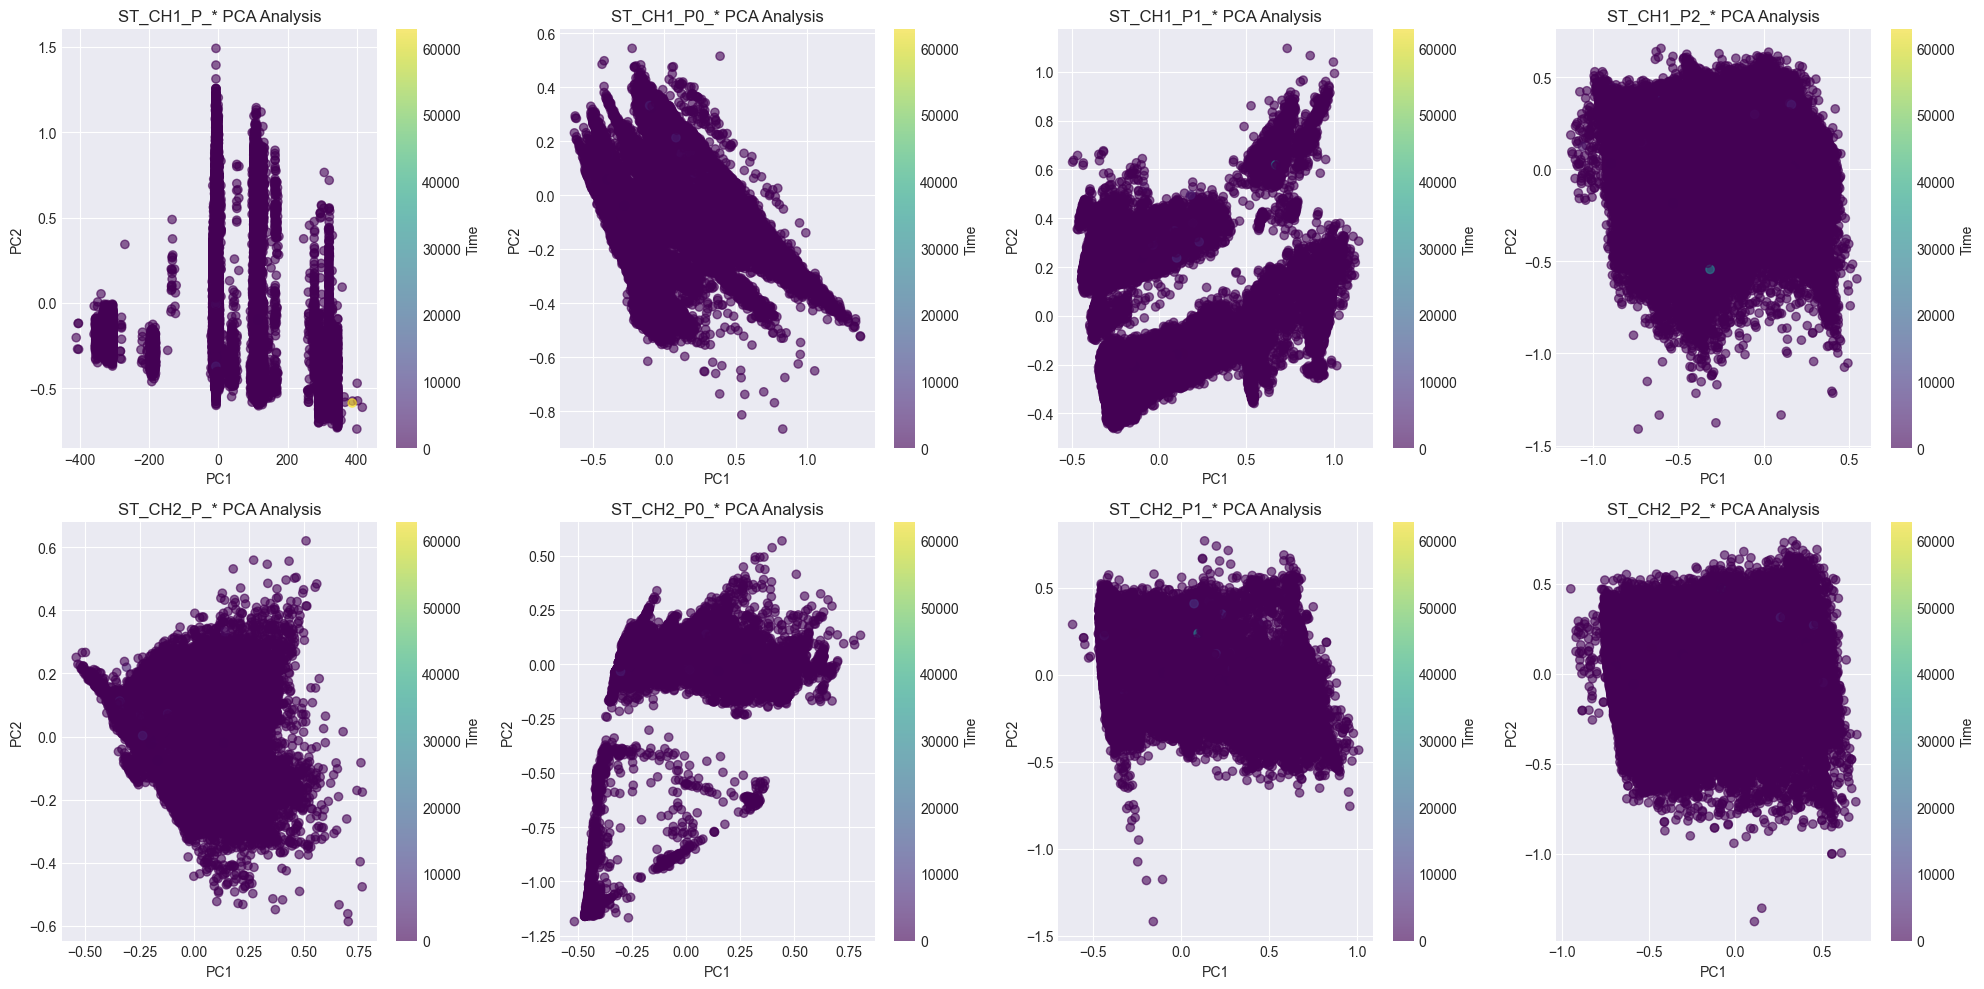

In [36]:
# 1. PCA on all feature groups
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, f in enumerate(cols):
    pca = PCA(n_components=13)
    pca_result = pca.fit_transform(df[[m for m in df.columns if f in m]])
    
    scatter = axes[idx].scatter(pca_result[:, 0], pca_result[:, 1], 
                                c=df['timediff_skv'], cmap='viridis', alpha=0.6)
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')
    axes[idx].set_title(f'{f}* PCA Analysis')
    plt.colorbar(scatter, ax=axes[idx], label='Time')

plt.tight_layout()
plt.show()

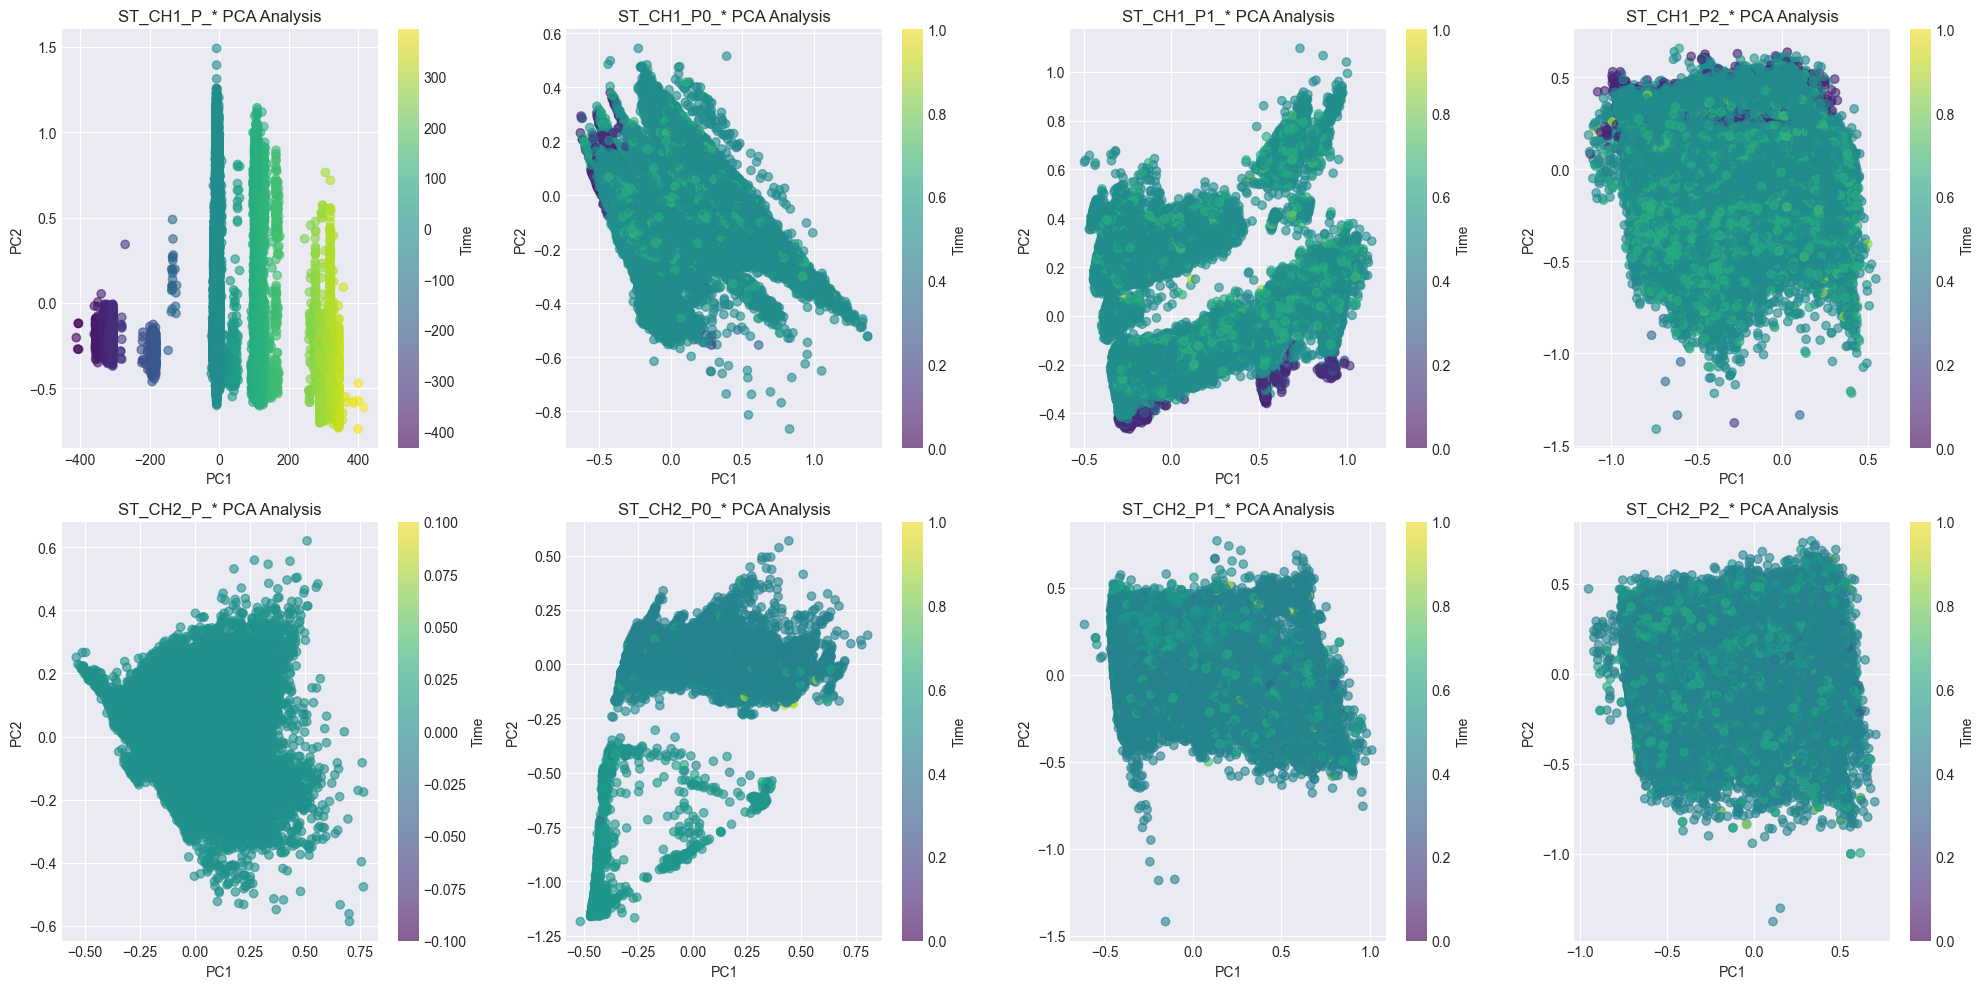

In [35]:
# 1. PCA on all feature groups
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, f in enumerate(cols):
    pca = PCA(n_components=13)
    pca_result = pca.fit_transform(df[[m for m in df.columns if f in m]])
    
    scatter = axes[idx].scatter(pca_result[:, 0], pca_result[:, 1], 
                                c=df[f + 'Time'], cmap='viridis', alpha=0.6)
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')
    axes[idx].set_title(f'{f}* PCA Analysis')
    plt.colorbar(scatter, ax=axes[idx], label='Time')

plt.tight_layout()
plt.show()



# 1. Top-Left
* Clear left-to-right progression with distinct vertical bands


# 2. Top Row, positions 2-4
* Similar degradation patterns but with different cluster shapes and densities


# 4.Bottom Row,second
* Pattern: Two distinct clusters visible, especially in P0_ 
* Hypothesis: These plots reveal two distinct operational modes or two different tools/setups
* Upper and lower clusters: May represent:
  - Different tool types used in production
  - Before/after major maintenance events
  - Before/after long pauses perhaps



In [93]:
# Create moving average with window size 30
df_ma = df.copy()

# Apply moving average to numeric columns only (excluding timestamp columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_ma[col] = df[col].rolling(window=30, min_periods=1).mean()

# Drop NaN values that might result from rolling
df_ma.dropna(inplace=True)

print(f"Original df shape: {df.shape}")
print(f"Moving average df shape: {df_ma.shape}")

Original df shape: (173824, 165)
Moving average df shape: (173824, 165)


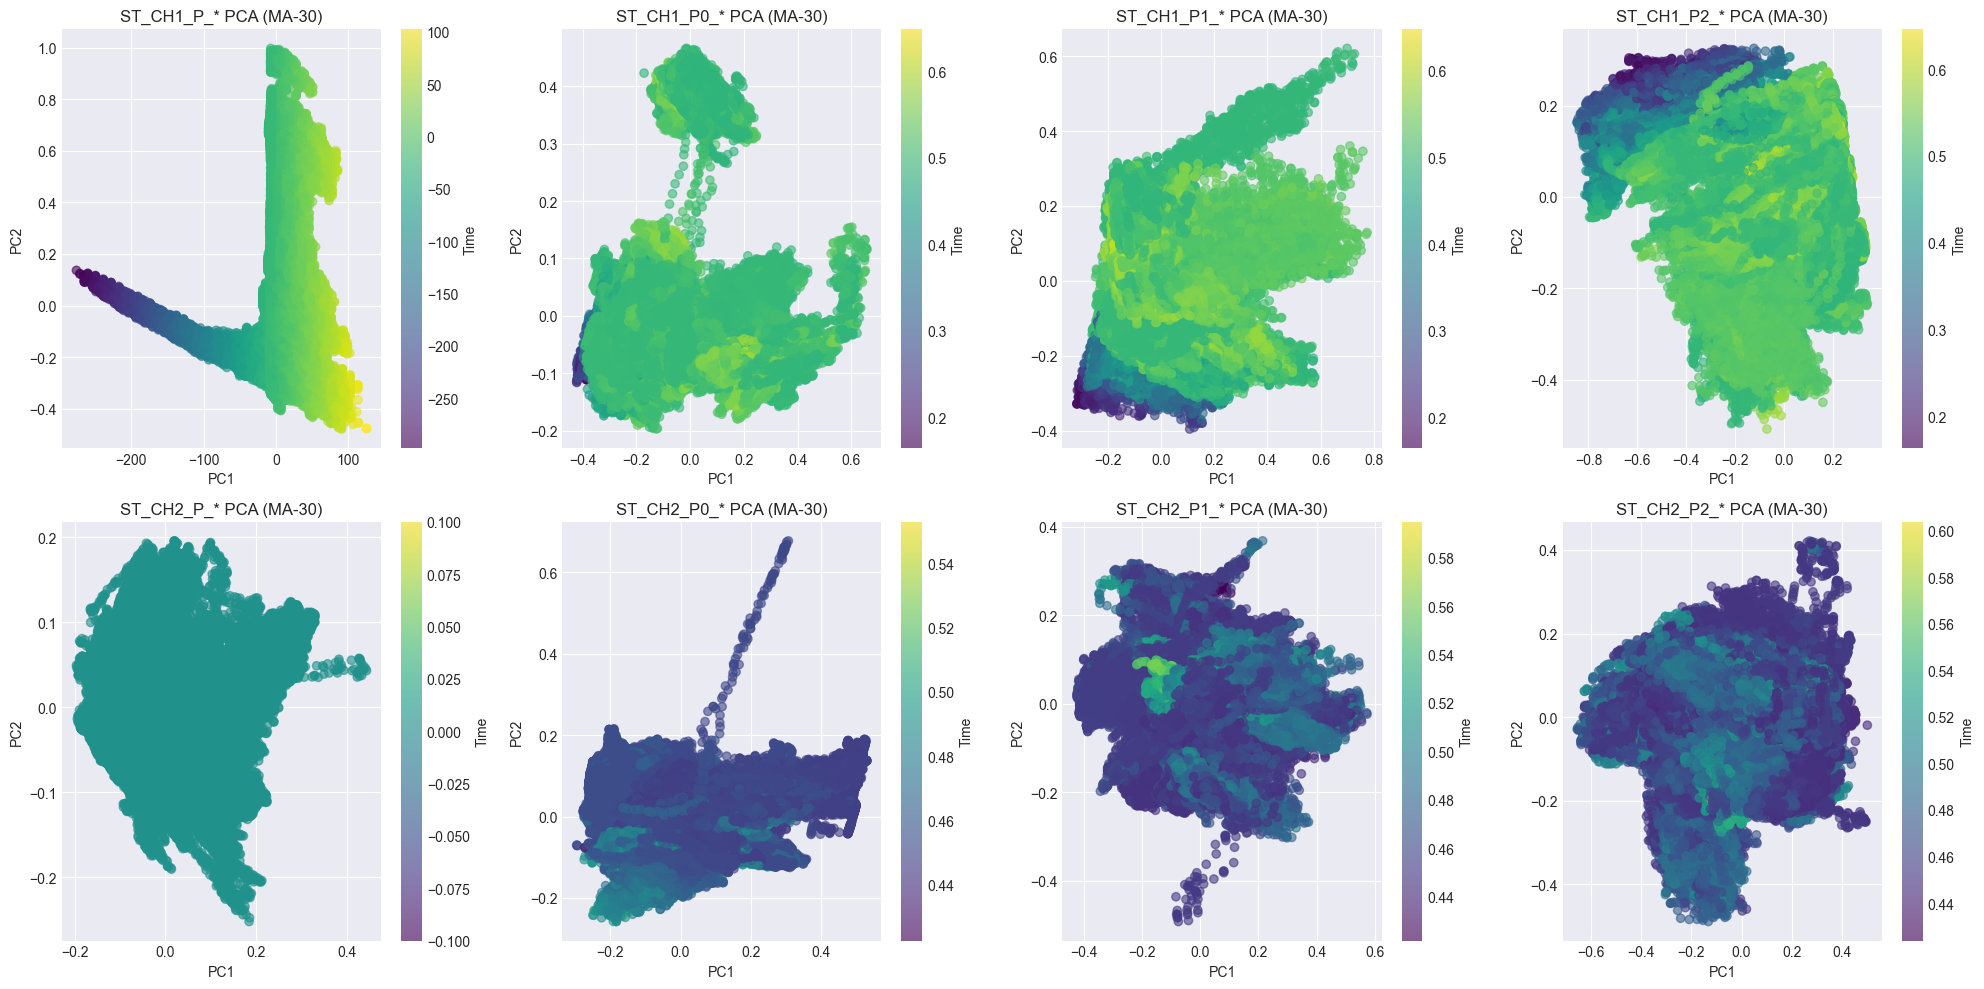

In [94]:
# PCA on all feature groups with moving average (window=30)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, f in enumerate(cols):
    pca = PCA(n_components=13)
    pca_result = pca.fit_transform(df_ma[[m for m in df_ma.columns if f in m]])
    
    scatter = axes[idx].scatter(pca_result[:, 0], pca_result[:, 1], 
                                c=df_ma[f + 'Time'], cmap='viridis', alpha=0.6)
    axes[idx].set_xlabel('PC1')
    axes[idx].set_ylabel('PC2')
    axes[idx].set_title(f'{f}* PCA (MA-30)')
    plt.colorbar(scatter, ax=axes[idx], label='Time')

plt.tight_layout()
plt.show()

# Top left
* shows clear degradation pattern

# bottom First
* Still same as before - less noice/stable
 
# bottom second
* some smooth lines are there after reducing noicy freq, hypothesis is - tool (product) change, or before/after difference

In [95]:
cols

['ST_CH1_P_',
 'ST_CH1_P0_',
 'ST_CH1_P1_',
 'ST_CH1_P2_',
 'ST_CH2_P_',
 'ST_CH2_P0_',
 'ST_CH2_P1_',
 'ST_CH2_P2_']

In [96]:
df

,timestamp_skv,timediff_skv,timestamp_sensor,timediff_sensor,SynchroDiff,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P_Time,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P0_Time,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P1_Time,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH1_P2_Time,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P_Time,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P0_Time,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P1_Time,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,ST_CH2_P2_Time,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,timestamp,Beacon INT0028 - BME280_RH,timestamp.1,Beacon INT0028 - BMP280_PRESS,timestamp.2,Beacon INT0028 - BMP280_TEMP,pieces,tool io
0,2022-11-17 16:33:49.400,0.0,2022-11-17 16:33:49.506,0.000,0.535357,0.148016,0.000000,0.047576,0.336590,0.003782,0.011360,0.000774,0.319300,0.011642,0.088070,0.222624,0.029954,-37.505,0.153279,0.185629,0.045486,1.0,0.075634,0.465044,0.727884,0.319086,0.076978,0.088727,0.192975,0.044420,0.478743,0.136051,0.275974,0.009899,0.166927,0.076372,0.127296,0.158077,0.090704,0.080645,0.074031,0.119076,0.021214,0.478742,0.152846,0.582133,0.099602,1.000000,0.248804,0.773180,0.085180,0.307744,0.022847,0.241919,0.166429,0.033680,0.478142,0.138897,0.023659,0.042514,0.794895,0.271746,0.242916,0.000286,0.174884,0.024676,0.030157,0.204493,0.012117,0.0,0.225397,0.043137,0.066427,1.0,0.298671,0.736926,0.801971,0.224630,0.053381,0.055197,0.108654,0.011466,0.447156,0.141523,0.255263,0.045644,0.432001,0.220467,0.219053,0.092695,0.186909,0.026901,0.214011,0.117437,0.044183,0.447156,0.221092,0.543807,0.090848,1.000000,0.394521,0.754979,0.205023,0.291620,0.034722,0.072039,0.230524,0.015560,0.446897,0.361702,0.944444,0.500000,0.852941,0.750000,0.077465,0.266667,0.235294,0.552941,0.393103,0.337349,1.0,0.375,0.979167,0.384615,0.962617,0.333333,0.125000,0.067568,0.122222,0.403846,0.646341,0.552846,1.0,0.571429,0.83,0.529412,0.857143,0.416667,0.1875,0.144928,0.217742,0.367925,0.193182,0.158333,1.0,0.100402,0.991694,0.16,0.913793,0.3125,0.072581,0.031532,0.231405,0.266667,0.913043,0.856,1.0,2022-11-17 04:31:39,0.782788,2022-11-17 04:31:39,0.241913,2022-11-17 04:31:39,0.798658,104563,0.0
1,2022-11-17 16:33:50.400,1.0,2022-11-17 16:33:51.006,1.500,0.702135,0.220171,0.066667,0.075500,0.126290,0.114286,0.016458,0.000774,0.347603,0.508095,0.059476,0.302551,0.033846,-37.150,0.208178,0.27844

In [97]:
all_imp_cols = ['ST_CH1_P_F0',
 'ST_CH1_P_F1',
 'ST_CH1_P_F2',
 'ST_CH1_P_F3',
 'ST_CH1_P_F4',
 'ST_CH1_P_F5',
 'ST_CH1_P_F6',
 'ST_CH1_P_F7',
 'ST_CH1_P_F8',
 'ST_CH1_P_F9',
 'ST_CH1_P_F10',
 'ST_CH1_P_F11',
 'ST_CH1_P0_F0',
 'ST_CH1_P0_F1',
 'ST_CH1_P0_F2',
 'ST_CH1_P0_F3',
 'ST_CH1_P0_F4',
 'ST_CH1_P0_F5',
 'ST_CH1_P0_F6',
 'ST_CH1_P0_F7',
 'ST_CH1_P0_F8',
 'ST_CH1_P0_F9',
 'ST_CH1_P0_F10',
 'ST_CH1_P0_F11',
 'ST_CH1_P1_F0',
 'ST_CH1_P1_F1',
 'ST_CH1_P1_F2',
 'ST_CH1_P1_F3',
 'ST_CH1_P1_F4',
 'ST_CH1_P1_F5',
 'ST_CH1_P1_F6',
 'ST_CH1_P1_F7',
 'ST_CH1_P1_F8',
 'ST_CH1_P1_F9',
 'ST_CH1_P1_F10',
 'ST_CH1_P1_F11',
 'ST_CH1_P2_F0',
 'ST_CH1_P2_F1',
 'ST_CH1_P2_F2',
 'ST_CH1_P2_F3',
 'ST_CH1_P2_F4',
 'ST_CH1_P2_F5',
 'ST_CH1_P2_F6',
 'ST_CH1_P2_F7',
 'ST_CH1_P2_F8',
 'ST_CH1_P2_F9',
 'ST_CH1_P2_F10',
 'ST_CH1_P2_F11',
 'ST_CH2_P_F0',
 'ST_CH2_P_F1',
 'ST_CH2_P_F2',
 'ST_CH2_P_F3',
 'ST_CH2_P_F4',
 'ST_CH2_P_F5',
 'ST_CH2_P_F6',
 'ST_CH2_P_F7',
 'ST_CH2_P_F8',
 'ST_CH2_P_F9',
 'ST_CH2_P_F10',
 'ST_CH2_P_F11',
 'ST_CH2_P0_F0',
 'ST_CH2_P0_F1',
 'ST_CH2_P0_F2',
 'ST_CH2_P0_F3',
 'ST_CH2_P0_F4',
 'ST_CH2_P0_F5',
 'ST_CH2_P0_F6',
 'ST_CH2_P0_F7',
 'ST_CH2_P0_F8',
 'ST_CH2_P0_F9',
 'ST_CH2_P0_F10',
 'ST_CH2_P0_F11',
 'ST_CH2_P1_F0',
 'ST_CH2_P1_F1',
 'ST_CH2_P1_F2',
 'ST_CH2_P1_F3',
 'ST_CH2_P1_F4',
 'ST_CH2_P1_F5',
 'ST_CH2_P1_F6',
 'ST_CH2_P1_F7',
 'ST_CH2_P1_F8',
 'ST_CH2_P1_F9',
 'ST_CH2_P1_F10',
 'ST_CH2_P1_F11',
 'ST_CH2_P2_F0',
 'ST_CH2_P2_F1',
 'ST_CH2_P2_F2',
 'ST_CH2_P2_F3',
 'ST_CH2_P2_F4',
 'ST_CH2_P2_F5',
 'ST_CH2_P2_F6',
 'ST_CH2_P2_F7',
 'ST_CH2_P2_F8',
 'ST_CH2_P2_F9',
 'ST_CH2_P2_F10',
 'ST_CH2_P2_F11',
 '4.713 SKV#1',
 '0.604 min SKV#1',
 '0.604 max SKV#1',
 '0.74 min SKV#1',
 '0.74 max SKV#1',
 '4,96 SKV#1',
 '4,40 SKV#1',
 '5,36 SKV#1',
 '5,92 SKV#1',
 'Sym aussen SKV#1',
 'Sym Einstich SKV#1',
 'Licht-Einstich frei SKV#1',
 '4.713 SKV#2',
 '0.604 min SKV#2',
 '0.604 max SKV#2',
 '0.74 min SKV#2',
 '0.74 max SKV#2',
 '4,96 SKV#2',
 '4,40 SKV#2',
 '5,36 SKV#2',
 '5,92 SKV#2',
 'Sym Einstich SKV#2',
 'Sym aussen SKV#2',
 'Licht-Einstich frei SKV#2',
 '4.713 SKV#3',
 '0.604 min SKV#3',
 '0.604 max SKV#3',
 '0.74 min SKV#3',
 '0.74 max SKV#3',
 '4,96 SKV#3',
 '4,40 SKV#3',
 '5,36 SKV#3',
 '5,92 SKV#3',
 'Sym Einstich SKV#3',
 'Sym aussen SKV#3',
 'Licht-Einstich frei SKV#3',
 '4.713 SKV#4',
 '0.604 min SKV#4',
 '0.604 max SKV#4',
 '0.74 min SKV#4',
 '0.74 max SKV#4',
 '4,96 SKV#4',
 '4,40 SKV#4',
 '5,36 SKV#4',
 '5,92 SKV#4',
 'Sym Einstich SKV#4',
 'Sym aussen SKV#4',
 'Licht-Einstich frei SKV#4',
 'Beacon INT0028 - BME280_RH',
 'Beacon INT0028 - BMP280_PRESS',
 'Beacon INT0028 - BMP280_TEMP',
#  'pieces',
#  'tool io'
 ]


In [98]:
df_all = df.copy()
df_all[all_imp_cols]

,ST_CH1_P_F0,ST_CH1_P_F1,ST_CH1_P_F2,ST_CH1_P_F3,ST_CH1_P_F4,ST_CH1_P_F5,ST_CH1_P_F6,ST_CH1_P_F7,ST_CH1_P_F8,ST_CH1_P_F9,ST_CH1_P_F10,ST_CH1_P_F11,ST_CH1_P0_F0,ST_CH1_P0_F1,ST_CH1_P0_F2,ST_CH1_P0_F3,ST_CH1_P0_F4,ST_CH1_P0_F5,ST_CH1_P0_F6,ST_CH1_P0_F7,ST_CH1_P0_F8,ST_CH1_P0_F9,ST_CH1_P0_F10,ST_CH1_P0_F11,ST_CH1_P1_F0,ST_CH1_P1_F1,ST_CH1_P1_F2,ST_CH1_P1_F3,ST_CH1_P1_F4,ST_CH1_P1_F5,ST_CH1_P1_F6,ST_CH1_P1_F7,ST_CH1_P1_F8,ST_CH1_P1_F9,ST_CH1_P1_F10,ST_CH1_P1_F11,ST_CH1_P2_F0,ST_CH1_P2_F1,ST_CH1_P2_F2,ST_CH1_P2_F3,ST_CH1_P2_F4,ST_CH1_P2_F5,ST_CH1_P2_F6,ST_CH1_P2_F7,ST_CH1_P2_F8,ST_CH1_P2_F9,ST_CH1_P2_F10,ST_CH1_P2_F11,ST_CH2_P_F0,ST_CH2_P_F1,ST_CH2_P_F2,ST_CH2_P_F3,ST_CH2_P_F4,ST_CH2_P_F5,ST_CH2_P_F6,ST_CH2_P_F7,ST_CH2_P_F8,ST_CH2_P_F9,ST_CH2_P_F10,ST_CH2_P_F11,ST_CH2_P0_F0,ST_CH2_P0_F1,ST_CH2_P0_F2,ST_CH2_P0_F3,ST_CH2_P0_F4,ST_CH2_P0_F5,ST_CH2_P0_F6,ST_CH2_P0_F7,ST_CH2_P0_F8,ST_CH2_P0_F9,ST_CH2_P0_F10,ST_CH2_P0_F11,ST_CH2_P1_F0,ST_CH2_P1_F1,ST_CH2_P1_F2,ST_CH2_P1_F3,ST_CH2_P1_F4,ST_CH2_P1_F5,ST_CH2_P1_F6,ST_CH2_P1_F7,ST_CH2_P1_F8,ST_CH2_P1_F9,ST_CH2_P1_F10,ST_CH2_P1_F11,ST_CH2_P2_F0,ST_CH2_P2_F1,ST_CH2_P2_F2,ST_CH2_P2_F3,ST_CH2_P2_F4,ST_CH2_P2_F5,ST_CH2_P2_F6,ST_CH2_P2_F7,ST_CH2_P2_F8,ST_CH2_P2_F9,ST_CH2_P2_F10,ST_CH2_P2_F11,4.713 SKV#1,0.604 min SKV#1,0.604 max SKV#1,0.74 min SKV#1,0.74 max SKV#1,"4,96 SKV#1","4,40 SKV#1","5,36 SKV#1","5,92 SKV#1",Sym aussen SKV#1,Sym Einstich SKV#1,Licht-Einstich frei SKV#1,4.713 SKV#2,0.604 min SKV#2,0.604 max SKV#2,0.74 min SKV#2,0.74 max SKV#2,"4,96 SKV#2","4,40 SKV#2","5,36 SKV#2","5,92 SKV#2",Sym Einstich SKV#2,Sym aussen SKV#2,Licht-Einstich frei SKV#2,4.713 SKV#3,0.604 min SKV#3,0.604 max SKV#3,0.74 min SKV#3,0.74 max SKV#3,"4,96 SKV#3","4,40 SKV#3","5,36 SKV#3","5,92 SKV#3",Sym Einstich SKV#3,Sym aussen SKV#3,Licht-Einstich frei SKV#3,4.713 SKV#4,0.604 min SKV#4,0.604 max SKV#4,0.74 min SKV#4,0.74 max SKV#4,"4,96 SKV#4","4,40 SKV#4","5,36 SKV#4","5,92 SKV#4",Sym Einstich SKV#4,Sym aussen SKV#4,Licht-Einstich frei SKV#4,Beacon INT0028 - BME280_RH,Beacon INT0028 - BMP280_PRESS,Beacon INT0028 - BMP280_TEMP
0,0.148016,0.000000,0.047576,0.336590,0.003782,0.011360,0.000774,0.319300,0.011642,0.088070,0.222624,0.029954,0.153279,0.185629,0.045486,1.0,0.075634,0.465044,0.727884,0.319086,0.076978,0.088727,0.192975,0.044420,0.136051,0.275974,0.009899,0.166927,0.076372,0.127296,0.158077,0.090704,0.080645,0.074031,0.119076,0.021214,0.152846,0.582133,0.099602,1.000000,0.248804,0.773180,0.085180,0.307744,0.022847,0.241919,0.166429,0.033680,0.138897,0.023659,0.042514,0.794895,0.271746,0.242916,0.000286,0.174884,0.024676,0.030157,0.204493,0.012117,0.225397,0.043137,0.066427,1.0,0.298671,0.736926,0.801971,0.224630,0.053381,0.055197,0.108654,0.011466,0.141523,0.255263,0.045644,0.432001,0.220467,0.219053,0.092695,0.186909,0.026901,0.214011,0.117437,0.044183,0.221092,0.543807,0.090848,1.000000,0.394521,0.754979,0.205023,0.291620,0.034722,0.072039,0.230524,0.015560,0.361702,0.944444,0.500000,0.852941,0.750000,0.077465,0.266667,0.235294,0.552941,0.393103,0.337349,1.0,0.375,0.979167,0.384615,0.962617,0.333333,0.125000,0.067568,0.122222,0.403846,0.646341,0.552846,1.0,0.571429,0.83,0.529412,0.857143,0.416667,0.1875,0.144928,0.217742,0.367925,0.193182,0.158333,1.0,0.100402,0.991694,0.16,0.913793,0.3125,0.072581,0.031532,0.231405,0.266667,0.913043,0.856,1.0,0.782788,0.241913,0.798658
1,0.220171,0.066667,0.075500,0.126290,0.114286,0.016458,0.000774,0.347603,0.508095,0.059476,0.302551,0.033846,0.208178,0.278443,0.070145,1.0,0.178168,0.413858,0.721689,0.373316,0.082680,0.094946,0.315717,0.048218,0.183450,0.392857,0.020742,0.274851,0.124377,0.226379,0.158077,0.151154,0.571114,0.123861,0.107255,0.061553,0.142406,0.634006,0.087977,1.000000,0.269537,0.775926,0.118820,0.278727,0.028120,0.185087,0.176211,0.032700,0.147364,0.029968,0.042755,0.725611,0.248350,0.243269,0.000286,0.163380,0.043288,0.023302,0.272818,0.007250,0.223717,0.043137,0.065597,1.0,0.276141,0.737814,0.802051,0.215934,0.053381,0.050650,0.111827,0.010432,0.17

In [99]:
len(all_imp_cols)

147

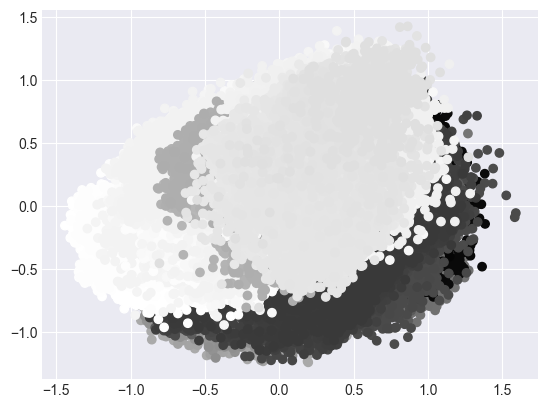

In [100]:
pca = PCA(n_components=147)
pca_result = pca.fit_transform(df_all[all_imp_cols])
    
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['pieces'])


* Doesn't make any sense, too much overlapping

In [101]:
# Create moving average with window size 50 for all important columns
df_all_ma = df.copy()

# Apply moving average to the important columns
for col in all_imp_cols:
    df_all_ma[col] = df[col].rolling(window=50, min_periods=1).mean()

# Drop NaN values that might result from rolling
df_all_ma.dropna(inplace=True)

print(f"Original df shape: {df.shape}")
print(f"Moving average df shape: {df_all_ma.shape}")

Original df shape: (173824, 165)
Moving average df shape: (173824, 165)


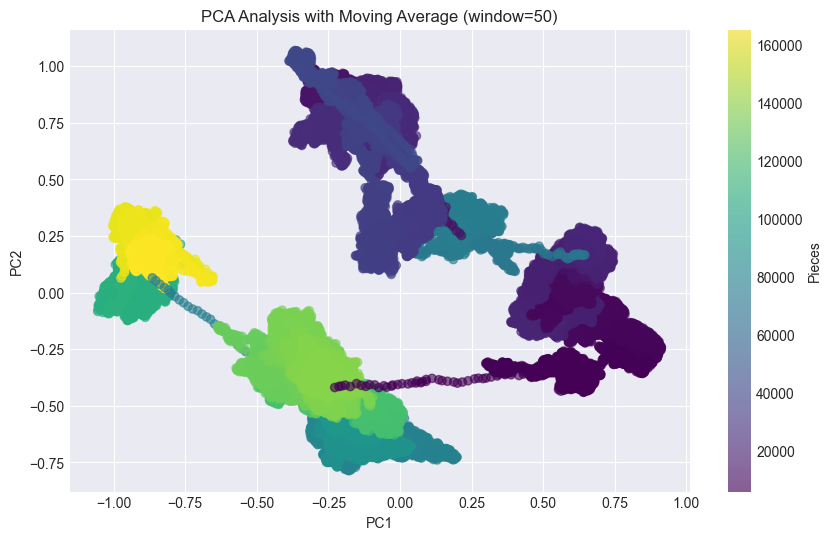

In [102]:
# PCA with moving average (window=50)
pca_ma = PCA(n_components=147)
pca_result_ma = pca_ma.fit_transform(df_all_ma[all_imp_cols])
    
plt.figure(figsize=(10, 6))
plt.scatter(pca_result_ma[:, 0], pca_result_ma[:, 1], c=df_all_ma['pieces'], cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis with Moving Average (window=50)')
plt.colorbar(label='Pieces')
plt.show()

* data set might have noice or randomness because it sensor data, doing movingAverage can be good option, here we take 50 steps moving average.
* It seems we can distinguise some of the features but some features has some of the inspiration or relation on each other,